In [1]:
# Set the access keys and the end points for tracking as environment variables
%env AWS_ACCESS_KEY_ID=XSHDLTACETFLQURZSAUJ
%env AWS_SECRET_ACCESS_KEY=ISvyN9Aay40ZIaMuQcngOCJdzkSqR85ON1ng9PNZ
%env MLFLOW_S3_ENDPOINT_URL=http://s3.padre-lab.eu
%env MLFLOW_TRACKING_URI=http://mlflow.padre-lab.eu
%env MONGO_DB = pypads
%env MONGO_USER=pypads
%env MONGO_URL=mongodb://www.padre-lab.eu:2222
%env MONGO_PW=8CN7OqknwhYr3RO

env: AWS_ACCESS_KEY_ID=XSHDLTACETFLQURZSAUJ
env: AWS_SECRET_ACCESS_KEY=ISvyN9Aay40ZIaMuQcngOCJdzkSqR85ON1ng9PNZ
env: MLFLOW_S3_ENDPOINT_URL=http://s3.padre-lab.eu
env: MLFLOW_TRACKING_URI=http://mlflow.padre-lab.eu
env: MONGO_DB=pypads
env: MONGO_USER=pypads
env: MONGO_URL=mongodb://www.padre-lab.eu:2222
env: MONGO_PW=8CN7OqknwhYr3RO


In [2]:
# Initialize PyPads and start tracking
# PyPads should be the first import in the experiment 
from pypads.app.base import PyPads

tracker = PyPads(uri="http://mlflow.padre-lab.eu")
tracker.activate_tracking()
tracker.start_track(experiment_name="Keras Example")

2020-10-09 15:18:52.782 | INFO     | pypads.app.base:activate_tracking:555 - Activating tracking by extending importlib...
2020-10-09 15:18:53.796 | INFO     | pypads.injections.setup.misc_setup:_call:73 - Tracking execution to run with id 99468820d4d542839c990dd45a50a46a
2020-10-09 15:18:55.469 | WARNING  | pypads.app.misc.managed_git:preserve_changes:84 - There are uncommitted changes in your git!
2020-10-09 15:18:55.791 | WARNING  | pypads.app.misc.managed_git:create_tracking_branch:134 - Stashing, branching out, committing, reverting back and unstashing...
2020-10-09 15:18:56.111 | INFO     | pypads.app.misc.managed_git:preserve_changes:91 - Created branch PyPads/99468820d4d542839c990dd45a50a46a
2020-10-09 15:18:56.529 | WARNING  | pypads.app.misc.managed_git:_handle_error:19 - Couldn't initialized git repository because of exception: Preserving commit failed due to INVALID_PARAMETER_VALUE: Tag value 'diff --git a/.idea/.gitignore b/.idea/.gitignore
new file mode 100644
index 00000

In [3]:
# Set random seed to avoid non-determininsm
tracker.actuators.set_random_seed(seed=1)

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/torch/distributed/distributed_c10d.py:125: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


In [4]:
# Example takes from keras documentation https://keras.io/examples/vision/mnist_convnet/
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# MNIST has 10 classes [0-9]
# Each image is a grayscale image of shape 28x28
num_classes = 10
input_shape = (28, 28, 1)

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Create the training and testing datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Scale the input values between 0 and 1

In [7]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [8]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Create the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [12]:
# Set training parameters
batch_size = 128
epochs = 15

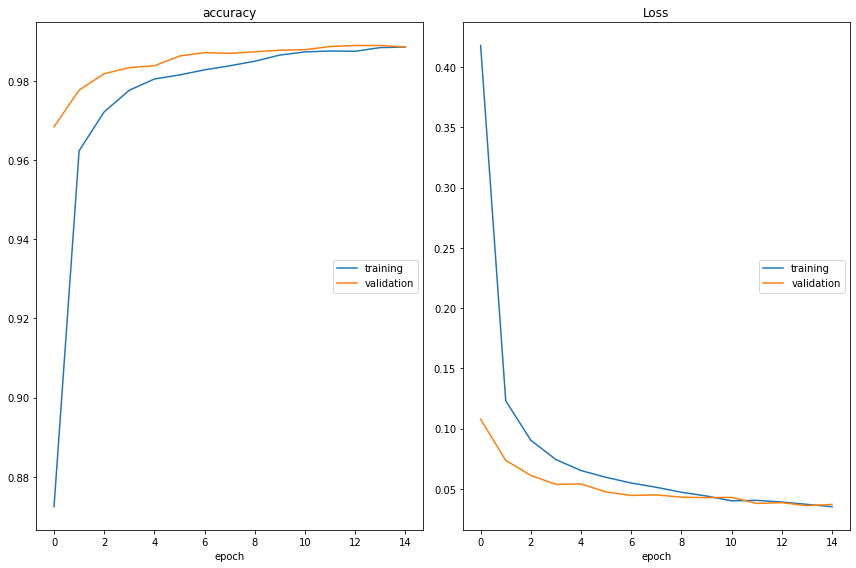

accuracy
	training         	 (min:    0.872, max:    0.989, cur:    0.989)
	validation       	 (min:    0.968, max:    0.989, cur:    0.989)
Loss
	training         	 (min:    0.035, max:    0.418, cur:    0.035)
	validation       	 (min:    0.036, max:    0.108, cur:    0.037)


In [13]:
# Train the model
from livelossplot import PlotLossesKeras
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, callbacks=[PlotLossesKeras()], verbose=0)

In [14]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test loss: 0.028045285493135452
Test accuracy: 0.9908999800682068


In [15]:
# Compute the probabilities of the predictions and convert to classes
y_prob = model.predict(x_test)
predicted = y_prob.argmax(axis=-1)

In [16]:
# Use the classification report from sklearn to print metrics
from sklearn.metrics import classification_report
y_test = y_test.argmax(axis=-1)
print(classification_report(y_test, predicted))

2020-10-09 15:21:07.444 | WARNING  | pypads.injections.analysis.parameters:__post__:109 - No parameters are defined on the mapping file for <class 'sklearn.preprocessing._label.LabelEncoder'>. Trying to log parameters without schema definition programmatically.
2020-10-09 15:21:07.549 | WARNING  | pypads.injections.analysis.parameters:__post__:109 - No parameters are defined on the mapping file for <class 'sklearn.preprocessing._label.LabelEncoder'>. Trying to log parameters without schema definition programmatically.
2020-10-09 15:21:07.641 | WARNING  | pypads.injections.analysis.parameters:__post__:109 - No parameters are defined on the mapping file for <class 'sklearn.preprocessing._label.LabelEncoder'>. Trying to log parameters without schema definition programmatically.
2020-10-09 15:21:07.734 | WARNING  | pypads.injections.analysis.parameters:__post__:109 - No parameters are defined on the mapping file for <class 'sklearn.preprocessing._label.LabelEncoder'>. Trying to log paramet

## Logged Info

In [ ]:
tracker.api.active_run().info

In [ ]:
artifacts = tracker.api.get_artifacts(run_id=tracker.api.active_run().info.run_id, path="*")

### Tag Information

In [ ]:
tags = tracker.api.get_tags(run_id=tracker.api.active_run().info.run_id, name='pypads.system.process.cwd')
print(tags[0])

### Metric Information

In [ ]:
metrics = tracker.api.get_metrics(run_id=tracker.api.active_run().info.run_id, history=True)
print(metrics)

### Tracked Parameters

In [ ]:
parameters = tracker.api.get_parameters(run_id=tracker.api.active_run().info.run_id)
print(parameters)

### End tracking

In [ ]:
tracker.api.end_run()